In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import from CSV
input_file = 'NHANES_2017-2018.csv'
df = pd.read_csv(input_file)

In [3]:
# randomly select a subset of these values and save them as a csv file:
rng = np.random.RandomState(123456789)

In [4]:
n = df.shape[0]
n_draw = 42
idx = np.array([False]*(n-n_draw) + [True]*n_draw)
rng.shuffle(idx)

In [5]:
df_sample = df.loc[idx, ]

In [6]:
df_sample.to_csv('health_data.csv')

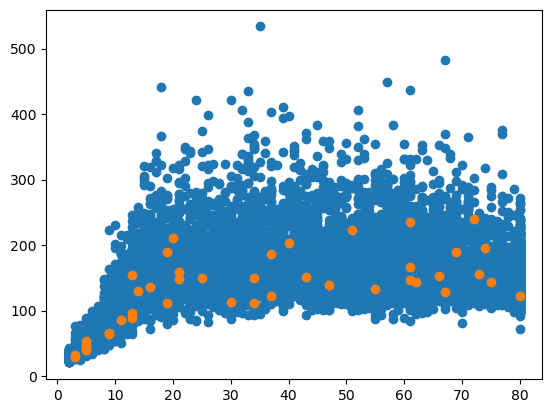

In [7]:
plt.scatter(df['Age'], df['Weight'])
plt.scatter(df_sample['Age'], df_sample['Weight'])

In [8]:
xvals_true = df['Height'][0:40]

In [9]:
print(np.round(xvals_true[0:10].values, 2))
print(np.round(xvals_true[10:20].values,2))
print(np.round(xvals_true[20:30].values,2))
print(np.round(xvals_true[30:40].values,2))

[2.91 3.09 5.19 5.76 5.2  4.93 4.96 5.6  5.67 5.86]
[4.85 5.6  5.22 5.71 5.16 5.27 5.05 5.07 5.58 3.65]
[4.78 5.07 5.31 6.17 5.68 5.5  5.9  5.33 4.68 4.85]
[4.7  4.51 5.58 3.82 6.02 4.46 5.85 6.16 5.08 3.51]


In [10]:
np.arange(2,7,1.0)

array([2., 3., 4., 5., 6.])

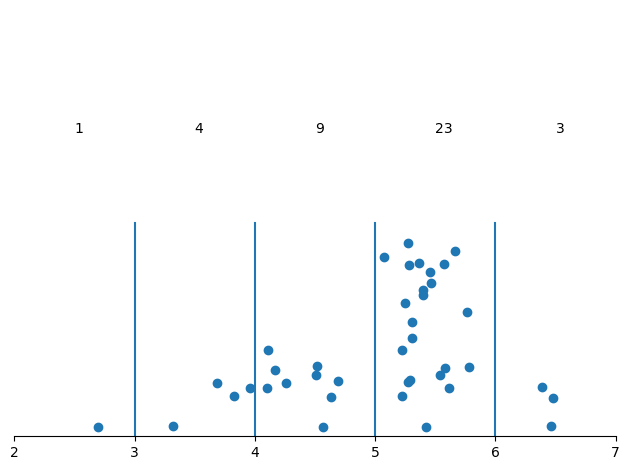

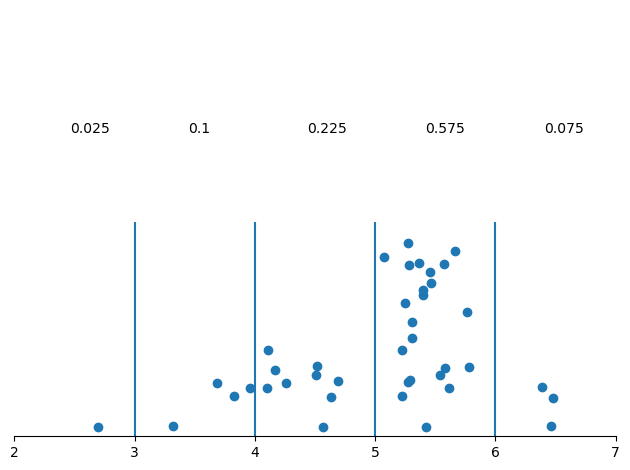

In [11]:
nval = len(xvals_true)
y_heights = np.sort(rng.rand(nval)/2)
cutoffs = np.array([2, 3, 4, 5, 6, 7])
#cutoffs = np.arange(2.5, 7, 0.5)

counts = np.array([sum(np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])) for i in range(len(cutoffs)-1)])
bin_means = np.array([np.mean(xvals_true[np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])]) for i in range(len(cutoffs)-1)])
weights = np.array([sum(xvals_true[np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])])/sum(xvals_true) for i in range(len(cutoffs)-1)])
yvals = []
for n in counts:
    yvals += list(y_heights[0:n])
yvals = np.array(yvals)*rng.uniform(1,1.05,nval)
xvals = []
eps = 0.01
for i in range(len(counts)):
    n = counts[i]
    temp = rng.uniform((1+eps)*cutoffs[i], (1-eps)*cutoffs[i+1], n)
    xvals += [temp[j] for j in range(len(temp))]

plt.scatter(xvals, yvals)
bucket_heights = 0.5
[plt.axvline(x, ymax=bucket_heights) for x in cutoffs[1:-1]]
plt.ylim(None,.7)
plt.xlim(2,7)
count_positions_y = [bucket_heights*1.01] * len(counts)
count_positions_x = (cutoffs[1:] + cutoffs[:-1])/2
#plt.text(x=count_positions_x[0], y=count_positions_y[0], s=str(counts[0]))
[plt.text(x=count_positions_x[j], y=count_positions_y[j], s=str(counts[j])) for j in range(len(counts))]

# Erase the axes so it'st just "buckets"
frame = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])
frame.axes.yaxis.set_visible(False)
frame.spines['top'].set_visible(False)
frame.spines['right'].set_visible(False)
# Y AXIS -BORDER
frame.spines['left'].set_visible(False)
# YELLOW
#ax.set_yticklabels([])
# GREEN
#ax.set_yticks([])
# YELLOW AND GREEN TOGHETHER
#ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('buckets_of_height_count.png')


plt.show()

plt.scatter(xvals, yvals)
bucket_heights = 0.5
[plt.axvline(x, ymax=bucket_heights) for x in cutoffs[1:-1]]
plt.ylim(None,.7)
plt.xlim(2,7)
count_positions_y = [bucket_heights*1.01] * len(counts)
bin_mids = (cutoffs[1:] + cutoffs[:-1])/2
#plt.text(x=count_positions_x[0], y=count_positions_y[0], s=str(counts[0]))
bin_heights = counts/sum(counts)
[plt.text(x=bin_mids[j]*.985, y=count_positions_y[j], s=str(round(counts[j]/sum(counts),3))) for j in range(len(counts))]

# Erase the axes so it'st just "buckets"
frame = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])
frame.axes.yaxis.set_visible(False)
frame.spines['top'].set_visible(False)
frame.spines['right'].set_visible(False)
# Y AXIS -BORDER
frame.spines['left'].set_visible(False)
# YELLOW
#ax.set_yticklabels([])
# GREEN
#ax.set_yticks([])
# YELLOW AND GREEN TOGHETHER
#ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('buckets_of_height_fraction.png')


In [12]:
bin_means = np.array([np.mean(xvals_true[np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])]) for i in range(len(cutoffs)-1)])
bin_vars = np.array([np.var(xvals_true[np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])]) for i in range(len(cutoffs)-1)])
bin_means[np.isnan(bin_means)] = 0

In [13]:
bin_mids = (cutoffs[1:] + cutoffs[:-1])/2
#plt.text(x=count_positions_x[0], y=count_positions_y[0], s=str(counts[0]))
bin_heights_pmf = counts/sum(counts)
bin_heights_histogram = bin_heights_pmf/np.diff(cutoffs)

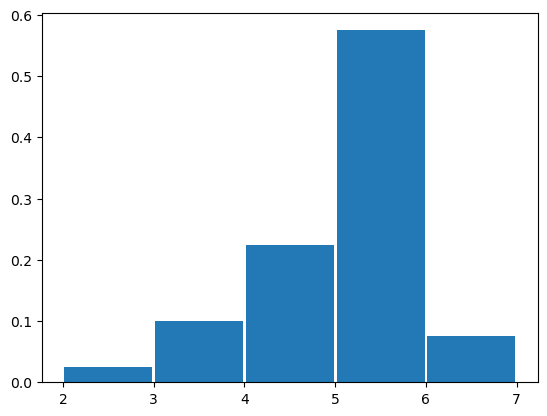

In [14]:
rwidth=0.97
plt.hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=rwidth, alpha=0.99) # step, stepfilled, bar
plt.savefig('histogram.png')

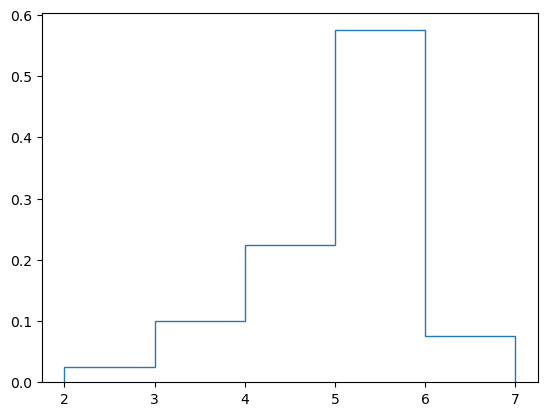

In [15]:
plt.hist(xvals_true, bins=cutoffs,density=True, histtype='step', rwidth=rwidth, alpha=0.99) # step, stepfilled, bar
plt.savefig('histogram_step.png')

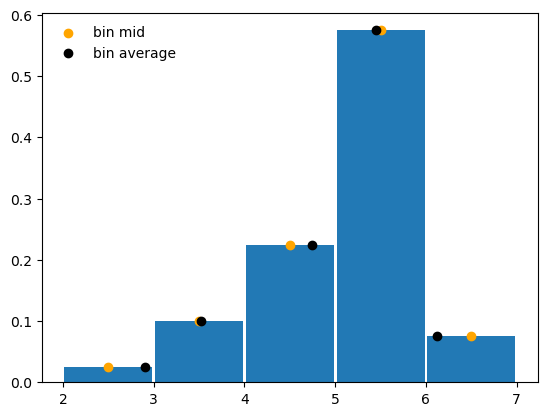

In [16]:
plt.hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=rwidth, alpha=0.99) # step, stepfilled, bar

plt.scatter(x=bin_mids, y=bin_heights_pmf, color='orange', label='bin mid')
plt.scatter(x=bin_means, y=bin_heights_pmf, color='black', label='bin average')
plt.legend(loc='best', frameon=False)
plt.savefig('histogram_with_mid_mean.png')

<BarContainer object of 5 artists>

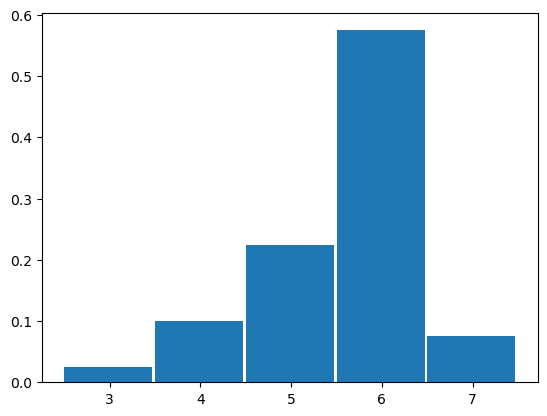

In [17]:
# Manually create the histogram:
rwidth=0.97
plt.bar(x=bin_mids, height=bin_heights_histogram, width=np.diff(cutoffs)*rwidth, align='edge')

In [18]:
bin_heights_pmf

array([0.025, 0.1  , 0.225, 0.575, 0.075])

In [19]:
0.225+0.575

0.7999999999999999

In [20]:
np.round(bin_means,2)

array([2.91, 3.52, 4.75, 5.45, 6.12])

In [21]:
5.082**2

25.826724

In [22]:
bin_heights_pmf@bin_means

np.float64(5.082349081364828)

In [23]:
(bin_heights_pmf@bin_means)**2

np.float64(25.830272184849914)

In [24]:
min(bin_heights_pmf[bin_heights_pmf > 0])

np.float64(0.025)

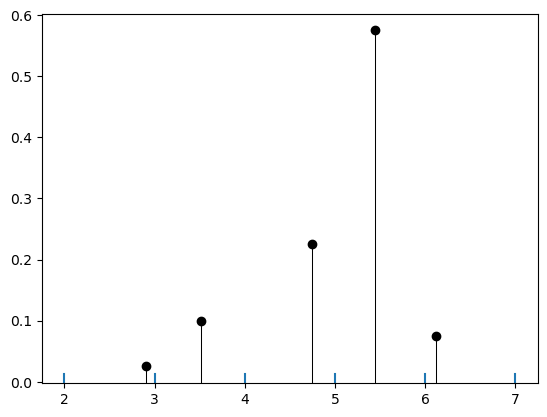

In [25]:
bucket_heights = min(bin_heights_pmf[bin_heights_pmf > 0]) if sum(bin_heights_pmf > 0) > 0 else 0.01
pmf_color='black'
plt.scatter(x=bin_means, y=bin_heights_pmf, color=pmf_color, label='bin average')
[plt.axvline(x, ymax=bucket_heights) for x in cutoffs]

#plt.vlines(x=bin_means, ymin=ylo, ymax=bin_heights_pmf, color='purple')
ax = plt.gca()
ymin, ymax = ax.get_ylim()
# Loop over each vertical line
for x, y_max in zip(bin_means, bin_heights_pmf):
    # Convert y_max to axis coordinates
    y_max_transformed = (y_max - ymin) / (ymax - ymin)
    ax.axvline(x=x, ymin=0, ymax=y_max_transformed, color=pmf_color, linestyle='-', linewidth=0.75)


In [26]:
x= np.array([2.91, 3.09, 5.19, 5.76, 5.2,  4.93, 4.96, 5.6,  5.67, 5.86, 
    4.85, 5.6,  5.22, 5.71, 5.16, 5.27, 5.05, 5.07, 5.58, 3.65,
    4.78, 5.07, 5.31, 6.17, 5.68, 5.5,  5.9,  5.33, 4.68, 4.85,
    4.70, 4.51, 5.58, 3.82, 6.02, 4.46, 5.85, 6.16, 5.08, 3.51])
print(sum(x))
print(np.mean(x))

203.29000000000002
5.08225


In [27]:
a = np.array([2.91,  3.09,  3.66,  4.46,  4.78, 5.20, 5.71,  6.12])
p = np.array([0.025, 0.025, 0.075, 0.025, 0.20, 0.30, 0.275, 0.075])
p@a

np.float64(5.08125)

In [28]:
np.dot(p, a**2)

np.float64(26.4092525)

In [29]:
np.mean(x**2)

np.float64(26.432117499999997)

In [30]:
sum(p)

np.float64(0.9999999999999999)

In [31]:
bin_heights_pmf

array([0.025, 0.1  , 0.225, 0.575, 0.075])

In [32]:
bin_mids
bin_means


array([2.90682415, 3.51870079, 4.74628171, 5.445481  , 6.11657918])

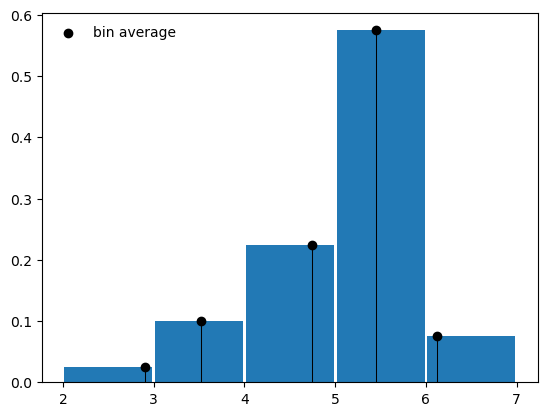

In [33]:
plt.hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar
plt.scatter(x=bin_means, y=bin_heights_pmf, color='black', label='bin average')
plt.legend(loc='best', frameon=False)
ax = plt.gca()
ymin, ymax = ax.get_ylim()
# Loop over each vertical line
for x, y_max in zip(bin_means, bin_heights_pmf):
    # Convert y_max to axis coordinates
    y_max_transformed = (y_max - ymin) / (ymax - ymin)
    ax.axvline(x=x, ymin=0, ymax=y_max_transformed, color=pmf_color, linestyle='-', linewidth=0.75)
z=plt.gca()
plt.savefig('histogram_with_mid_mean_and_straight_line.png')

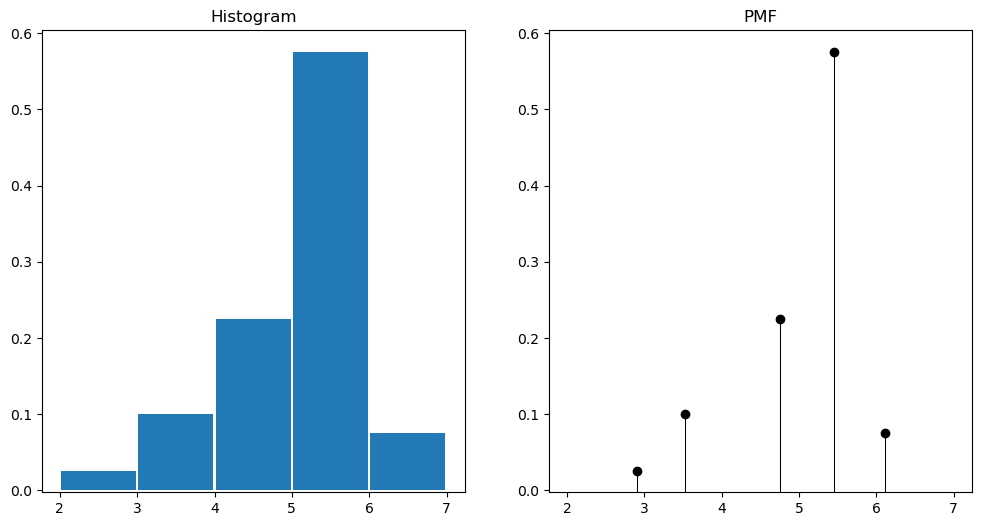

In [34]:
# assume xvals_true, cutoffs, bin_mids, bin_heights_pmf, pmf_color are defined elsewhere
show_cutoffs = False
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar
ax[0].set_title('Histogram')

ax[1].scatter(x=bin_means, y=bin_heights_pmf, color='black', label='bin average')
ax[1].set_title('PMF')
if show_cutoffs:
    bucket_heights = min(bin_heights_pmf[bin_heights_pmf > 0]) if sum(bin_heights_pmf > 0) > 0 else 0.01
    [ax[1].axvline(x, ymax=bucket_heights) for x in cutoffs]


#ax = plt.gca()
ymin0, ymax0 = ax[0].get_ylim()
ymin1, ymax1 = ax[1].get_ylim()
ymin=min(ymin0,ymin1)
ymax=max(ymax0,ymax1)

ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

ax[1].set_xlim(ax[0].get_xlim())

# Loop over each vertical line
for x, y_max in zip(bin_means, bin_heights_pmf):
    # Convert y_max to axis coordinates
    y_max_transformed = (y_max - ymin) / (ymax - ymin)
    ax[1].axvline(x=x, ymin=0, ymax=y_max_transformed, color=pmf_color, linestyle='-', linewidth=0.75)

plt.savefig('histogram_and_PMF.png')


In [35]:
# Because of law of total probability, the mean and variance of this discrete function
# should be the same as the mean and variance of the data, yes?
def dmean(p, x):
    return p@x
def dvar(p,x,v):
    mu = dmean(p, x)
    var = p@v
    return(p@(x-mu)**2 + p@v)

In [36]:
print(np.mean(xvals_true))
print(np.var(xvals_true,ddof=0))

5.08234908136483
0.6030307512003914


In [37]:
bin_vars = np.array([np.var(xvals_true[np.logical_and(xvals_true > cutoffs[i],xvals_true < cutoffs[i+1])]) for i in range(len(cutoffs)-1)])

In [38]:
print(dmean(bin_heights_pmf, bin_means))
print(dvar(bin_heights_pmf, bin_means, bin_vars))

5.082349081364828
0.603030751200391


## Now build an ECDF

In [39]:
class ECDF:
    def __init__(self, X):
        self.X=np.array(X)
        self.X.sort()
        
    def __call__(self, x):
        try:
            return np.mean(self.X <= x)
        except ValueError:
            return np.array([np.mean(self.X <= xi) for xi in x])

class ECDFplot:
    def __init__(self, X):
        self.X=np.array(X)
        self.X.sort()
        self.N = len(X)

    def plot(self, filename=None, eps=0.1, show=True, color=None, points=True, marker='.'):
        '''Plots the data following the description in the text.
        filename: the name of the file to save as, in the current workign directory
        eps: the fraction to plot below the min value (1-eps)*min(X) and above the max (1+eps)*max(X)
        show: bool, whether to plot the image as well as save it.'''

        minx = min(self.X)*(1-eps)
        maxx = max(self.X)*(1+eps)
        x0 = minx
        x = []
        y = []
        ax = plt.subplot()
        for i in range(self.N):
            yi = i/self.N
            #yipt = yi
            yipt = (i+1)/self.N # think about where < vs <= is used
            if color is None and i == 0:
                # if color is None, just apply first color to all
                p = ax.plot((x0,self.X[i]), (yi,yi))
                color = p[0].get_color()
            else: 
                ax.plot((x0,self.X[i]), (yi,yi), color=color)
            if points:
                ax.scatter(self.X[i], yipt,marker=marker, color=color)
            x.append( (x0, self.X[i]))
            y.append( i/self.N)
            x0 = self.X[i]
        x.append( (self.X[-1], maxx))
        y.append(1)        
        ax.plot((self.X[-1], maxx), (1,1), color=color)
        #ax = plt.subplot()
        #[ax.plot(x[i][0], y[i], x[i][1], y[i]) for i in range(self.N)]
        if filename is not None:
            plt.savefig(filename)
        if show:
            plt.show()
        return x,y,ax

    def plot_points(self, marker='.', filename=None, show=True, color=None):
        '''Plots the data following the description in the text, *points only*
        filename: the name of the file to save as, in the current workign directory
        marker: what the 'marker style' should be; default is '.'  See: https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
        show: bool, whether to plot the image as well as save it
        color: str, the name of the color for all lines. If None, use the first color pyplot uses.'''

        ax = plt.subplot()
        for i in range(self.N):
            yi = (i+1)/self.N
            if color is None and i == 0:
                # if color is None, just apply first color to all
                p = ax.scatter(self.X[i], yi,marker=marker)
                plt.draw()
                color = p.get_facecolors()[0].tolist()
            else: 
                ax.scatter(self.X[i], yi, color=color, marker=marker)
        if filename is not None:
            plt.savefig(filename)
        if show:
            plt.show()
        return ax

In [40]:
ecdf = ECDF(xvals_true)

In [41]:
# build comparison, gut-check correct:
import scipy.stats as stats
res = stats.ecdf(xvals_true)

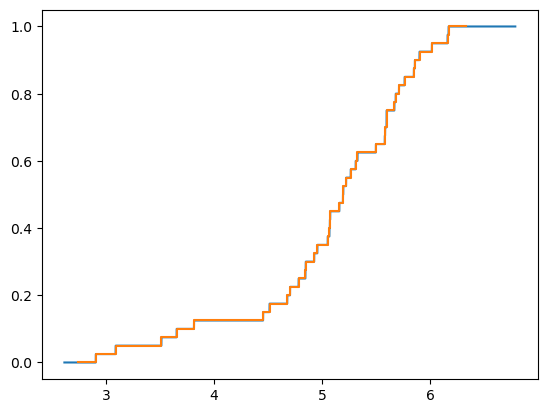

In [42]:
eps = 0.1
N = len(xvals_true)*100  # Make it much more fine-grained than the data to get simple step function
xx = np.linspace(min(xvals_true)*(1-eps), 
                 max(xvals_true)*(1+eps),
                 N)

ax = plt.subplot()
ax.plot(xx, ecdf(xx))
res.cdf.plot(ax)  # gut-check with scipy stats


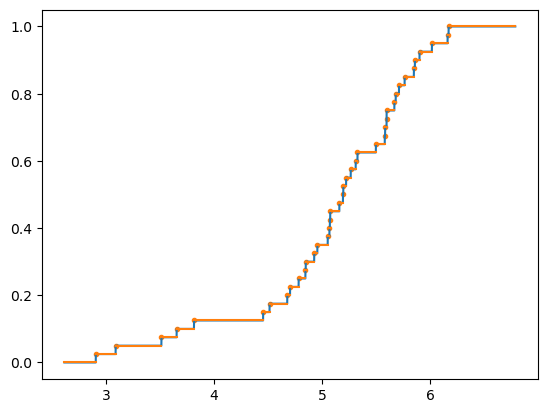

In [43]:
plt.plot(xx, ecdf(xx))
ecdf_plot = ECDFplot(xvals_true)
xvals,yvals,ax = ecdf_plot.plot(show=False)


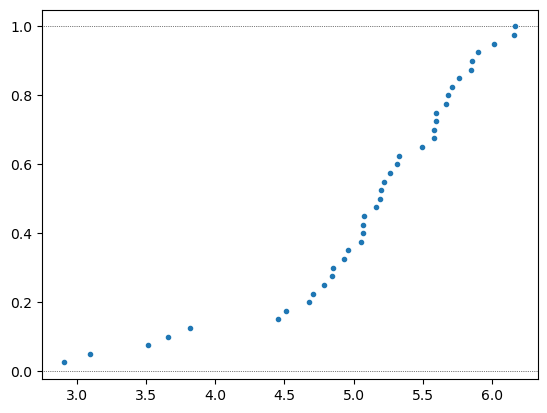

In [44]:
ax = ecdf_plot.plot_points(show=False)
ax.axhline(y=0,color='black', linewidth=0.5, linestyle='dotted',zorder=-1.0)
ax.axhline(y=1,color='black', linewidth=0.5, linestyle='dotted',zorder=-1.0)
plt.savefig('ECDF_points_only.png')

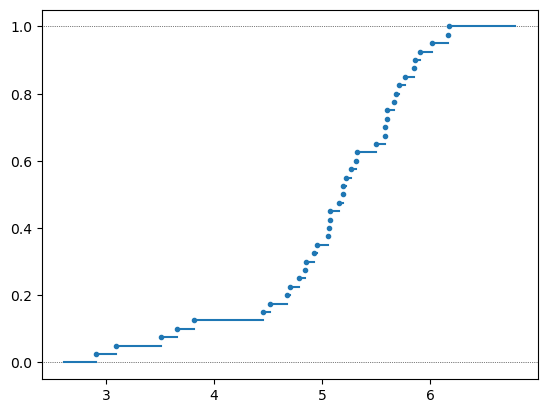

In [45]:
xvals,yvals,ax = ecdf_plot.plot(show=False)
ax.axhline(y=0,color='black', linewidth=0.5, linestyle='dotted',zorder=-1.0)
ax.axhline(y=1,color='black', linewidth=0.5, linestyle='dotted',zorder=-1.0)
plt.savefig('ECDF_points_and_lines.png')

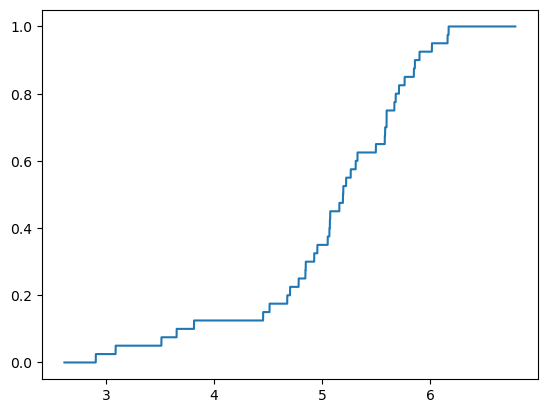

In [46]:
ax = plt.subplot()
ax.plot(xx, ecdf(xx))
plt.savefig('ECDF_step.png')

In [47]:
xvals_true

0     2.906824
1     3.090551
2     5.193570
3     5.764436
4     5.196850
5     4.927822
6     4.957349
7     5.597113
8     5.669291
9     5.859580
10    4.849081
11    5.597113
12    5.223097
13    5.711942
14    5.160761
15    5.265748
16    5.052493
17    5.072178
18    5.580709
19    3.654856
20    4.783465
21    5.068898
22    5.311680
23    6.171260
24    5.682415
25    5.498688
26    5.902231
27    5.328084
28    4.678478
29    4.845801
30    4.704724
31    4.514436
32    5.583990
33    3.815617
34    6.017060
35    4.455381
36    5.849738
37    6.161417
38    5.075459
39    3.513780
Name: Height, dtype: float64

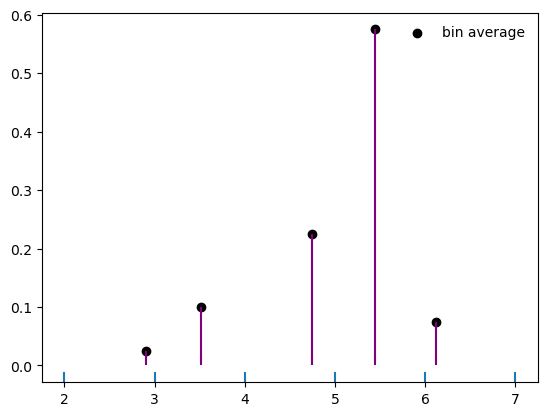

In [48]:
# Create the probability mass function:
#plt.scatter(x=bin_mids, y=bin_heights_pmf, color='orange', label='bin mid')
bucket_heights = min(bin_heights_pmf[bin_heights_pmf > 0]) if sum(bin_heights_pmf > 0) > 0 else 0.01
pmf_color='black'
plt.scatter(x=bin_means, y=bin_heights_pmf, color=pmf_color, label='bin average')
[plt.axvline(x, ymax=bucket_heights) for x in cutoffs]

ax = plt.gca()
y_ax_min, y_ax_max = ax.get_ybound()
y_ax_range = y_ax_max-y_ax_min
#[plt.axvline(x, ymax=y*(y_ax_max), color=pmf_color) for x,y in zip(bin_means,bin_heights_pmf)]
plt.vlines(x=bin_means, ymin=0, ymax=bin_heights_pmf, color='purple')
#axA.get_xaxis_transform()
plt.legend(loc='best', frameon=False)


In [49]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

AttributeError: Line2D.set() got an unexpected keyword argument 'bins'

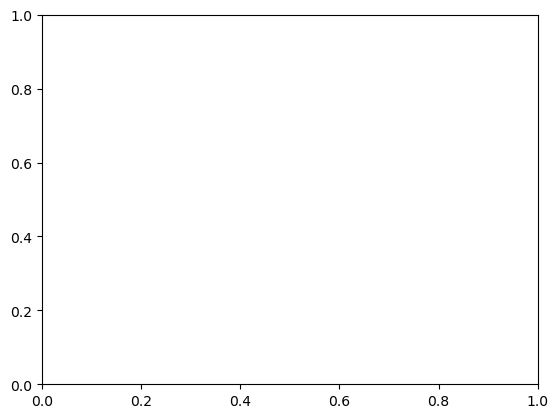

In [50]:
plt.plot(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar

plt.scatter(x=bin_mids, y=bin_heights, color='black', label='bin mid')
plt.scatter(x=bin_means, y=bin_heights, color='orange', label='bin average')
plt.legend(loc='best', frameon=False)
plt.savefig('histogram_with_mid_mean.png')

In [ ]:
plt.hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar

plt.scatter(x=bin_mids, y=bin_heights, color='black', label='bin mid')
plt.scatter(x=bin_means, y=bin_heights, color='orange', label='bin average')
plt.legend(loc='best', frameon=False)
plt.savefig('histogram_with_mid_mean.png')

In [ ]:
z = plt.hist(xvals_true, bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar

plt.scatter(x=bin_mids, y=bin_heights, color='black', label='bin mid')
plt.scatter(x=bin_means, y=bin_heights, color='orange', label='bin average')
plt.legend(loc='best', frameon=False)
plt.savefig('histogram_with_mid_mean.png')

In [51]:
z

<Axes: >

In [52]:
bin_heights@bin_mids

np.float64(5.074999999999999)

In [53]:
bin_heights@bin_means

np.float64(5.082349081364828)

In [58]:
np.mean(xvals_true)

np.float64(5.08234908136483)

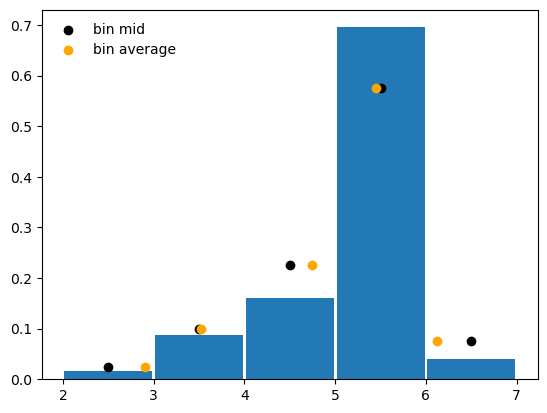

In [59]:
plt.hist(df['Height'], bins=cutoffs,density=True, histtype='bar', rwidth=0.97, alpha=0.99) # step, stepfilled, bar

plt.scatter(x=bin_mids, y=bin_heights, color='black', label='bin mid')
plt.scatter(x=bin_means, y=bin_heights, color='orange', label='bin average')
plt.legend(loc='best', frameon=False)


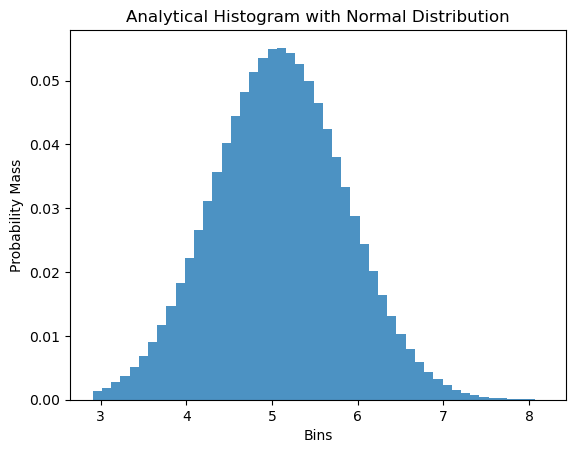

In [60]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def generate_analytical_histogram(dist_frozen, bin_edges):
    """
    Generate an analytical histogram using a frozen distribution (normal in this case).

    Parameters:
        data (array-like): The input 1D data array to be analyzed.
        bins (int or sequence of scalars): Number of equal width bins in the given range, or specify bin edges as an array.
                                            Default is 10.

    Returns:
        None - plots a histogram with bar heights representing probabilities within each specified bin
    """
    
    #bin_edges = list(sorted(set([np.min(data), np.max(data)] + list(bins))))

    probabilities = [dist_frozen((bin_edges[i+1] + bin_edges[i]) / 2) * (bin_edges[i+1] - bin_edges[i]) for i in range(len(bin_edges)-1)]

    plt.bar(bin_edges[:-1], probabilities, width=(bin_edges[1] - bin_edges[0]), align='edge', alpha=0.8)
    plt.xlabel('Bins')
    plt.ylabel('Probability Mass')
    plt.title("Analytical Histogram with Normal Distribution")

# Calculate mean and standard deviation from data
mu = np.mean(xvals_true)
sigma = np.std(xvals_true)

# Create frozen normal distribution
dist_frozen = norm(mu, scale=sigma).pdf

generate_analytical_histogram(dist_frozen, bin_edges=np.linspace(start=min(xvals_true), stop=max(xvals_true)+2, num=50))

(array([  3.,   4.,  14.,  37.,  37.,  62.,  39.,  54.,  49.,  52.,  67.,
         54.,  60.,  47.,  58.,  55.,  61.,  48.,  76.,  67.,  66.,  79.,
         69.,  66.,  76.,  66.,  85.,  94., 131., 188., 250., 381., 473.,
        492., 541., 559., 540., 502., 464., 456., 398., 341., 262., 189.,
        133.,  71.,  51.,  24.,   9.,   5.]),
 array([2.56889764, 2.64724409, 2.72559055, 2.80393701, 2.88228346,
        2.96062992, 3.03897638, 3.11732283, 3.19566929, 3.27401575,
        3.3523622 , 3.43070866, 3.50905512, 3.58740157, 3.66574803,
        3.74409449, 3.82244094, 3.9007874 , 3.97913386, 4.05748031,
        4.13582677, 4.21417323, 4.29251969, 4.37086614, 4.4492126 ,
        4.52755906, 4.60590551, 4.68425197, 4.76259843, 4.84094488,
        4.91929134, 4.9976378 , 5.07598425, 5.15433071, 5.23267717,
        5.31102362, 5.38937008, 5.46771654, 5.54606299, 5.62440945,
        5.70275591, 5.78110236, 5.85944882, 5.93779528, 6.01614173,
        6.09448819, 6.17283465, 6.2511811 , 6.

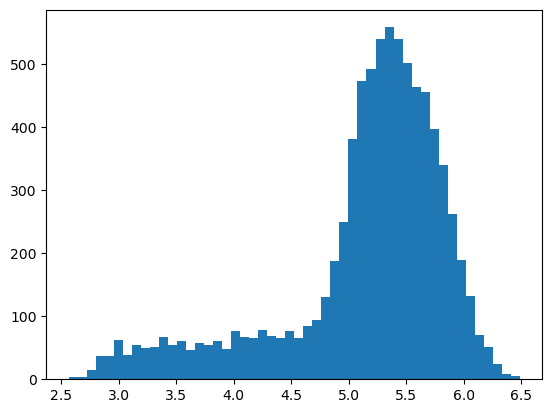

In [61]:
plt.hist(df['Height'], bins=50)

In [62]:
plt.text?

Signature:
plt.text(
    x: 'float',
    y: 'float',
    s: 'str',
    fontdict: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Text'
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Retur

In [63]:
count_positions_x[0]

np.float64(2.5)

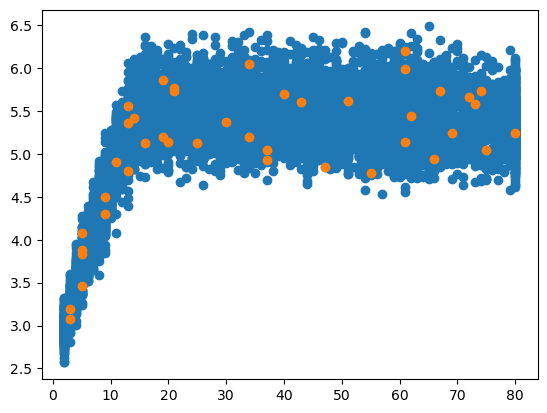

In [64]:
plt.scatter(df['Age'], df['Height'])
plt.scatter(df_sample['Age'], df_sample['Height'])

In [65]:
np.mean(np.isfinite(df['Height'].values))
np.mean(df['Age'] ==0)

np.float64(0.0)

(array([0.16008403, 0.10672269, 0.10672269, 0.21344538, 0.69369748,
        0.69369748, 0.26680672]),
 array([3.08070866, 3.52690289, 3.97309711, 4.41929134, 4.86548556,
        5.31167979, 5.75787402, 6.20406824]),
 <BarContainer object of 7 artists>)

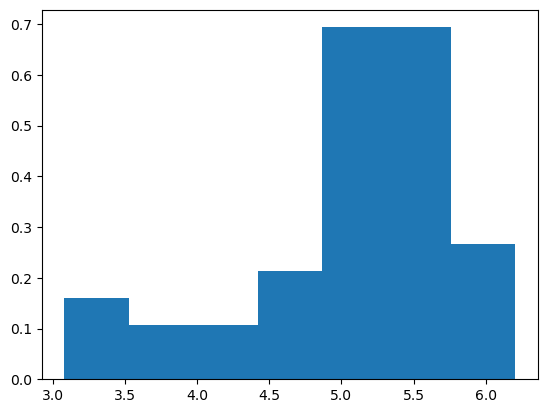

In [66]:
#plt.hist(df['Age'], density=True, bins=30)
plt.hist(df_sample['Height'], density=True, bins=7)

(array([0.02597403, 0.01515152, 0.00865801, 0.00865801, 0.00649351,
        0.01298701, 0.01298701]),
 array([ 3., 14., 25., 36., 47., 58., 69., 80.]),
 <BarContainer object of 7 artists>)

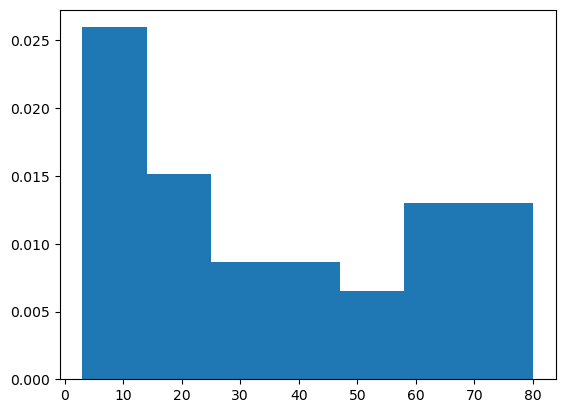

In [67]:
#plt.hist(df['Age'], density=True, bins=30)
plt.hist(df_sample['Age'], density=True, bins=7)

(array([ 7.,  4.,  8., 14.,  5.,  4.]),
 array([ 29.48,  64.46,  99.44, 134.42, 169.4 , 204.38, 239.36]),
 <BarContainer object of 6 artists>)

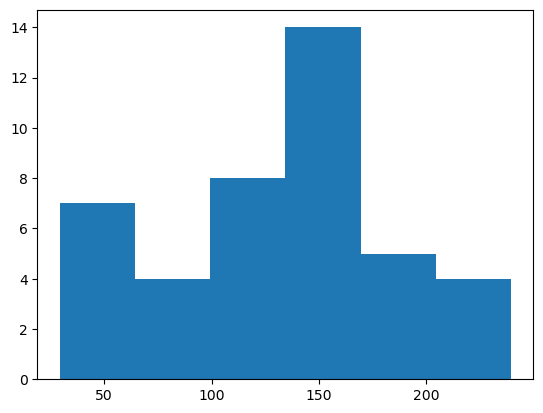

In [68]:
plt.hist(df_sample['Weight'], bins=6)

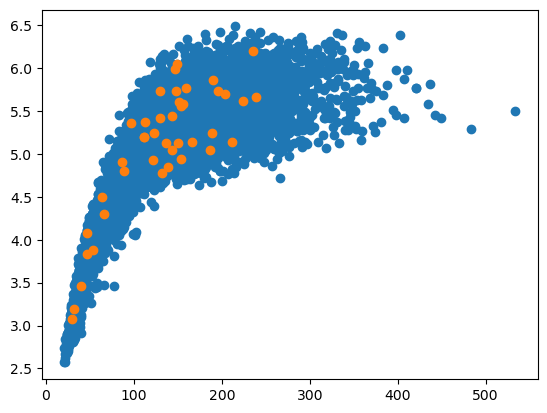

In [69]:
plt.scatter(x=df['Weight'].values, y=df['Height'].values)
plt.scatter(x=df_sample['Weight'].values, y=df_sample['Height'].values)

(array([[9.500e+01, 2.560e+02, 2.850e+02, 2.860e+02, 2.330e+02, 5.800e+01,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 2.100e+01, 1.230e+02, 3.110e+02,
         5.160e+02, 2.210e+02, 2.000e+01, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.610e+02,
         1.063e+03, 1.114e+03, 3.870e+02, 2.200e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.100e+01,
         4.290e+02, 8.260e+02, 5.530e+02, 4.900e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
         1.010e+02, 2.600e+02, 2.550e+02, 5.400e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.800e+01, 7.000e+01, 7.800e+01, 2.500e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         7.000e+00, 2.100e+01, 2.300e+01, 8.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 5.

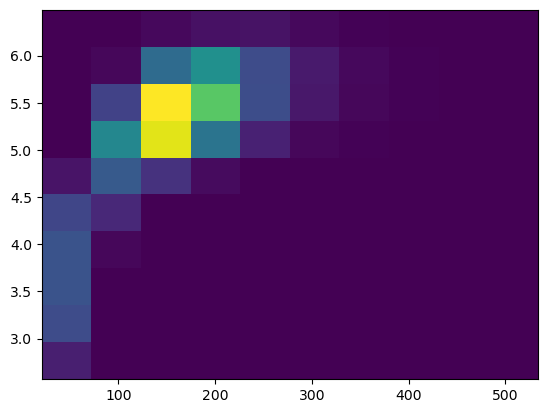

In [70]:
plt.hist2d(x=df['Weight'].values, y=df['Height'].values)